In [5]:
# Best Subset Selection
Hitters=read.csv("Hitters.csv",header=T)
#fix(Hitters)
#summary(Hitters)


In [6]:
dim(Hitters)
names(Hitters)
Hitters=Hitters[1:20]
dim(Hitters)

[1] 322  21

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague" "X"

[1] 322  20

In [7]:
sum(is.na(Hitters$Salary))
Hitters=na.omit(Hitters)
dim(Hitters)
sum(is.na(Hitters$Salary))

[1] 59

[1] 263  20

[1] 0

In [10]:
library(leaps)
regfit.full=regsubsets(Salary~.,Hitters,nvmax=19)
summary(regfit.full)
names(summary(regfit.full))

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters, nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 )  " "   "*"  " "  

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [11]:
summary(regfit.full)$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

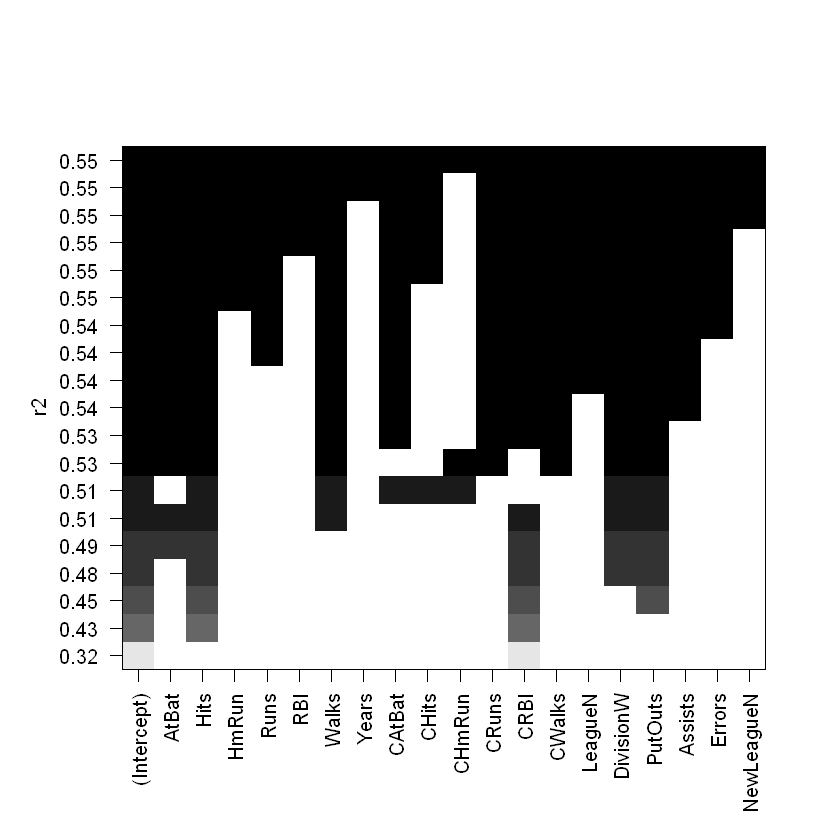

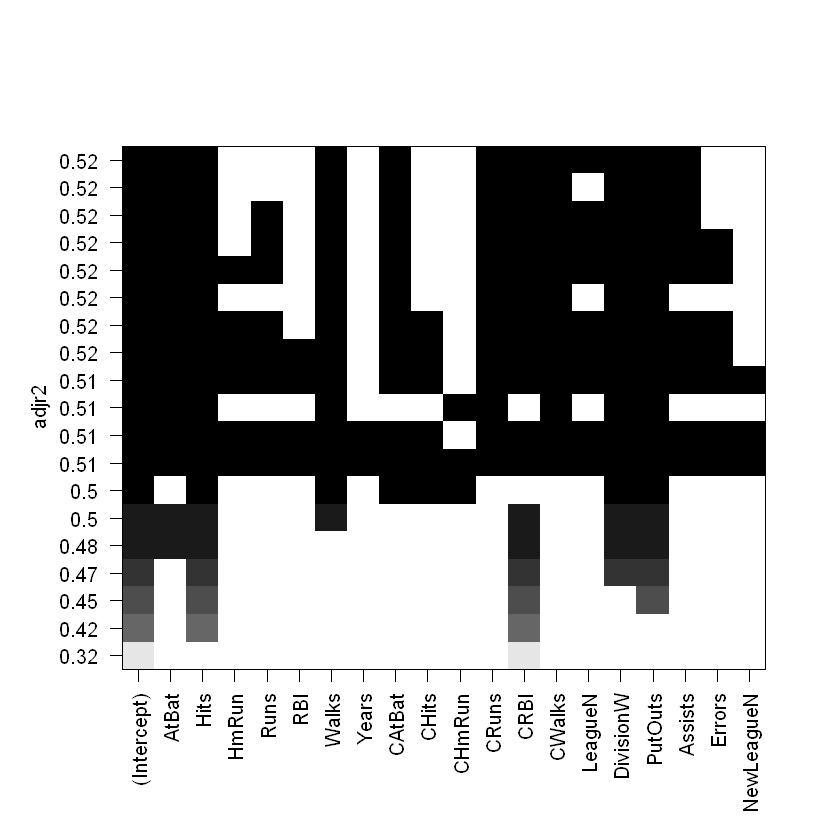

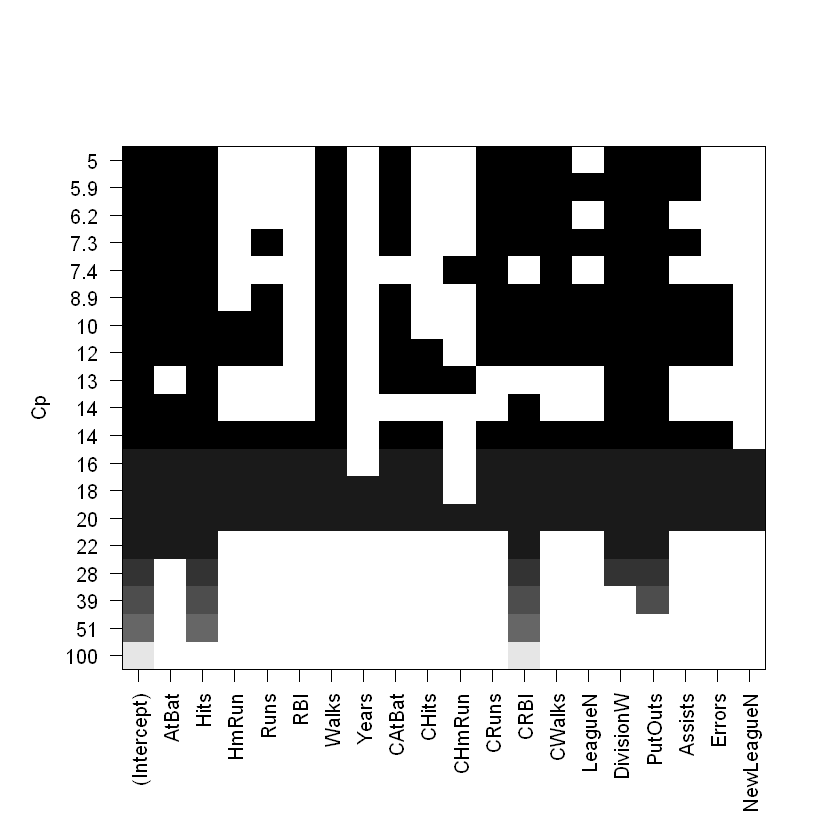

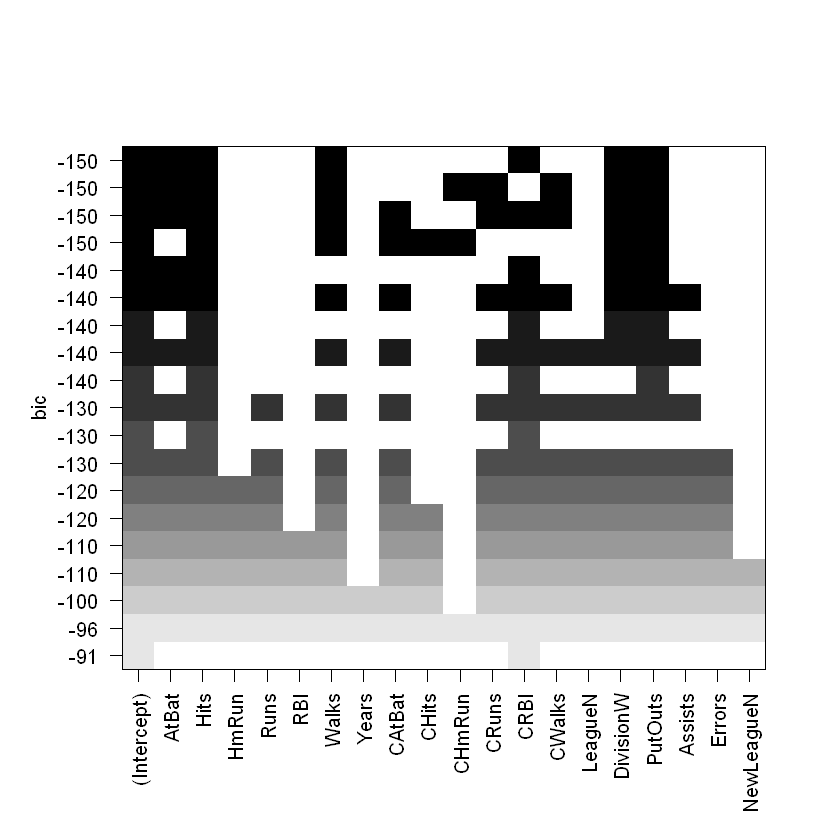

In [15]:

plot(regfit.full ,scale ="r2")
plot(regfit.full ,scale ="adjr2")
plot(regfit.full ,scale ="Cp")
plot(regfit.full ,scale ="bic")



In [30]:
# ridge regression(alpha=0) and lasso(alpha=1)
#glmnet standardizes variables by default
x=model.matrix(Salary~.,Hitters)[,-1]

y=Hitters$Salary

library(glmnet)
grid=10^seq(10,-2,length=100)

ridge.mod=glmnet(x,y,alpha=0,lambda=grid)
dim(coef(ridge.mod))

ridge.mod$lambda[50]
coef(ridge.mod)[,50]

ridge.mod$lambda[100]
coef(ridge.mod)[,100]

#predict the coef with diff values of lambda, lamba =50
predict (ridge.mod ,s=50, type ="coefficients")[1:20 ,]



[1]  20 100

[1] 11497.57

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

[1] 0.01

(Intercept)         AtBat          Hits         HmRun          Runs 
 164.11321606   -1.97386151    7.37772270    3.93660219   -2.19873625 
          RBI         Walks         Years        CAtBat         CHits 
  -0.91623008    6.20037718   -3.71403424   -0.17510063    0.21132772 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
   0.05629004    1.36605490    0.70965516   -0.79582173   63.40493257 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-117.08243713    0.28202541    0.37318482   -3.42400281  -25.99081928

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.876610e+01 -3.580999e-01  1.969359e+00 -1.278248e+00  1.145892e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.038292e-01  2.716186e+00 -6.218319e+00  5.447837e-03  1.064895e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.244860e-01  2.214985e-01  2.186914e-01 -1.500245e-01  4.592589e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.182011e+02  2.502322e-01  1.215665e-01 -3.278600e+00 -9.496680e+00

In [49]:
# calculate test error
set.seed(1)
train=sample(1:nrow(x),nrow(x)/2)
length(train)
test=(-train)

y.test=y[test]

# lambda = 4
ridge.mod =glmnet (x[train ,],y[train],alpha =0, lambda =grid ,thresh =1e-12)
ridge.pred=predict (ridge.mod ,s=4, newx=x[test ,])
mean(( ridge.pred -y.test)^2)

#lambda = 1e10

ridge.pred=predict (ridge.mod ,s=1e10, newx=x[test ,])
mean(( ridge.pred -y.test)^2)

#mse with only the intercept = mean of the training observations
mean(( mean(y[train ])-y.test)^2)

#if lambda=0 then its equivalent to linear regression
ridge.pred=predict (ridge.mod ,s=0, newx=x[test ,])
mean(( ridge.pred -y.test)^2)

lm(y~x, subset=train)
predict (ridge.mod ,s=0,type="coefficients") [1:20 ,]

[1] 131

[1] 101036.8

[1] 193253.1

[1] 193253.1

[1] 114723.6


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
(Intercept)       xAtBat        xHits       xHmRun        xRuns         xRBI  
  299.42849     -2.54027      8.36682     11.64512     -9.09923      2.44105  
     xWalks       xYears      xCAtBat       xCHits      xCHmRun       xCRuns  
    9.23440    -22.93673     -0.18154     -0.11598     -1.33888      3.32838  
      xCRBI      xCWalks     xLeagueN   xDivisionW     xPutOuts     xAssists  
    0.07536     -1.07841     59.76065    -98.86233      0.34087      0.34165  
    xErrors  xNewLeagueN  
   -0.64207     -0.67442  


(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
299.44467219  -2.53538355   8.33585019  11.59830815  -9.05971371   2.45326546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  9.21776006 -22.98239583  -0.18191651  -0.10565688  -1.31721358   3.31152519 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.06590689  -1.07244477  59.75587273 -98.94393005   0.34083276   0.34155445 
      Errors   NewLeagueN 
 -0.65312471  -0.65882930

[1] 211.7416

[1] 96015.51

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  9.88487157   0.03143991   1.00882875   0.13927624   1.11320781   0.87318990 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.80410229   0.13074381   0.01113978   0.06489843   0.45158546   0.12900049 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.13737712   0.02908572  27.18227535 -91.63411299   0.19149252   0.04254536 
      Errors   NewLeagueN 
 -1.81244470   7.21208390

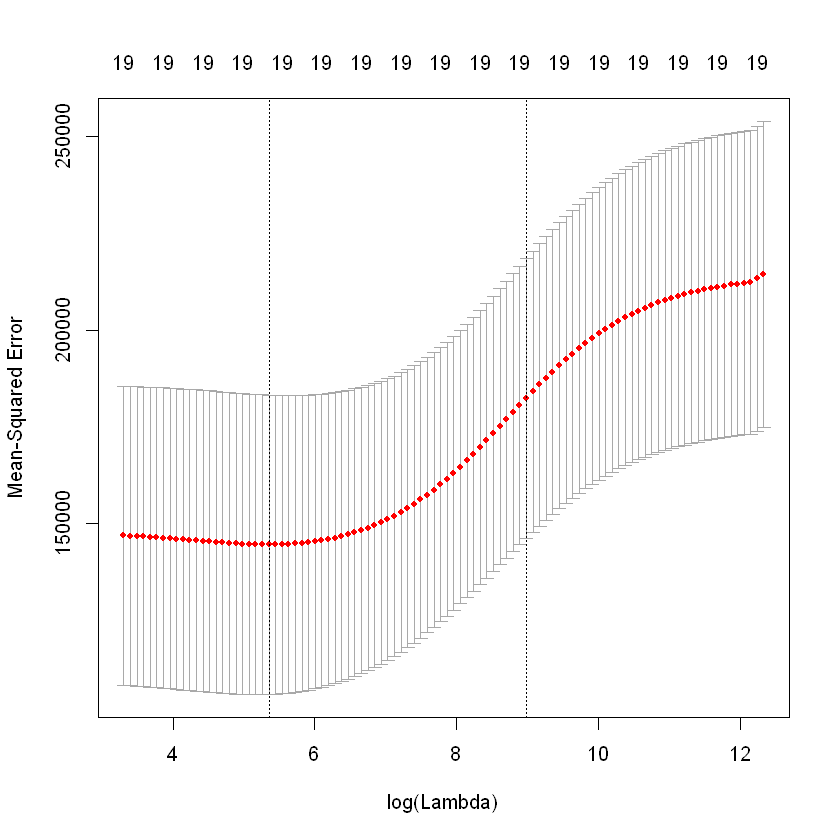

In [55]:
#cross validation to select the optimal value of lambda
#by default cv.glmnet does 10 fold cross validation

set.seed(1)
cv.out =cv.glmnet (x[train ,],y[train],alpha =0)
plot(cv.out)
bestlam =cv.out$lambda.min
bestlam

#what is the test mse with this lambda
ridge.pred=predict (ridge.mod ,s=bestlam ,newx=x[test ,])
mean(( ridge.pred -y.test)^2)

#finally refit our regression model with chosen lambda and find coef
out=glmnet(x,y,alpha=0)
predict (out ,type="coefficients",s=bestlam )[1:20 ,]

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    348.9    352.2    353.5    352.8    350.1    349.1
adjCV          452    348.7    351.8    352.9    352.1    349.3    348.0
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       349.6    350.9    352.9     353.8     355.0     356.2     363.5
adjCV    348.5    349.8    351.6     352.3     353.4     354.5     361.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        355.2     357.4     347.6     350.1     349.2     352.6
adjCV     352.8     355.2     345.5     347.6     346.7     349.8

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

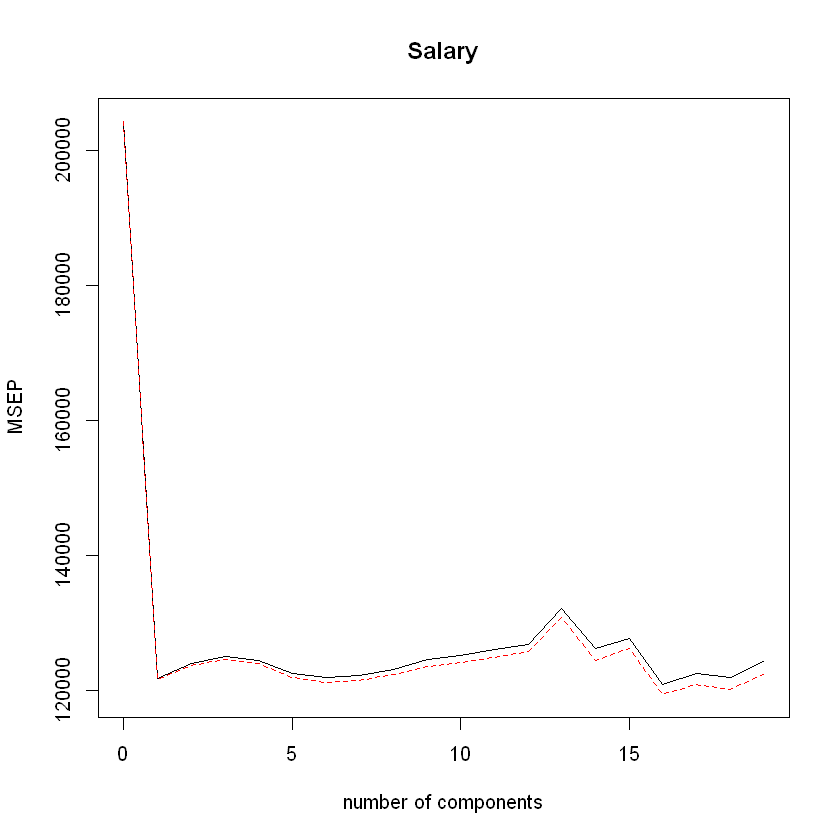

In [64]:
#pca 
library (pls)
set.seed(2)
pcr.fit=pcr(Salary~.,data=Hitters,scale=TRUE,validation='CV')
summary(pcr.fit)
validationplot(pcr.fit,val.type='MSEP')

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           464.6    399.3    400.5    402.3    407.0    396.6    397.6
adjCV        464.6    398.8    399.6    401.2    405.4    395.9    394.4
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       395.3    396.3    400.1     413.3     413.9     417.0     416.9
adjCV    393.3    394.0    397.6     410.2     410.7     413.7     413.2
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        413.1     414.6       414     402.3     396.8     399.2
adjCV     409.4     410.9       410     398.3     392.7     395.0

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.89    60.25    70.85    79.06    84.01    88.51    92.61    95.20
Salary    2

[1] 96556.22

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 7
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X    38.31    60.16    70.84    79.03    84.29    88.63    92.26
y    40.63    41.58    42.17    43.22    44.90    46.48    46.69


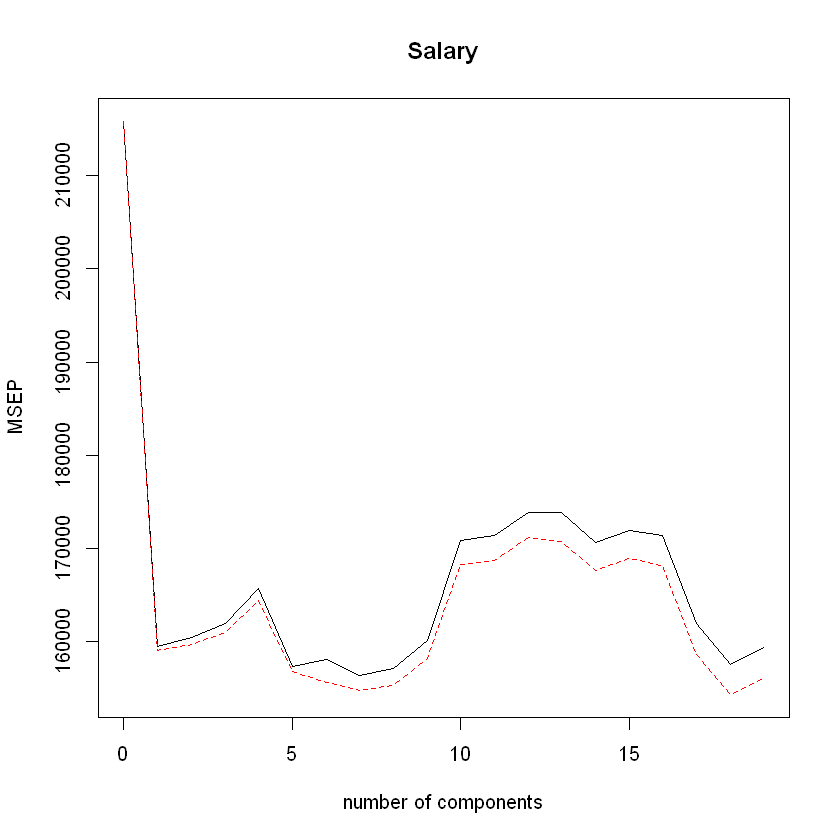

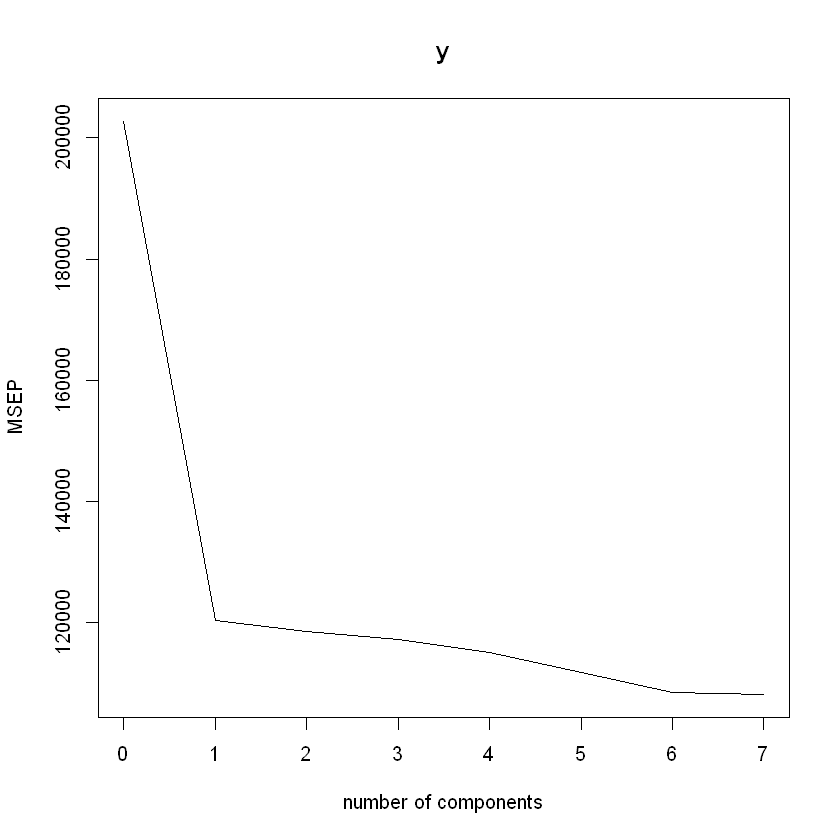

In [69]:
# pca on training subset
set.seed(2)
pcr.fit=pcr(Salary~.,data=Hitters,scale=TRUE,subset=train,validation='CV')
summary(pcr.fit)
validationplot(pcr.fit,val.type='MSEP')

pcr.pred=predict (pcr.fit ,x[test ,], ncomp =7)
mean((pcr.pred-y.test)^2)

#pcr on the full dataset
pcr.fit=pcr(y∼x,scale =TRUE ,ncomp =7)
summary(pcr.fit)
validationplot(pcr.fit,val.type='MSEP')

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           464.6    394.2    391.5    393.1    395.0    415.0    424.0
adjCV        464.6    393.4    390.2    391.1    392.9    411.5    418.8
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       424.5    415.8    404.6     407.1     412.0     414.4     410.3
adjCV    418.9    411.4    400.7     402.2     407.2     409.3     405.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        406.2     408.6     410.5     408.8     407.8     410.2
adjCV     401.8     403.9     405.6     404.1     403.2     405.5

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.12    53.46    66.05    74.49    79.33    84.56    87.09    90.74
Salary 

[1] 101417.5

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: kernelpls
Number of components considered: 2

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps
CV             452    349.0    346.4
adjCV          452    348.6    345.7

TRAINING: % variance explained
        1 comps  2 comps
X         38.08    51.03
Salary    43.05    46.40


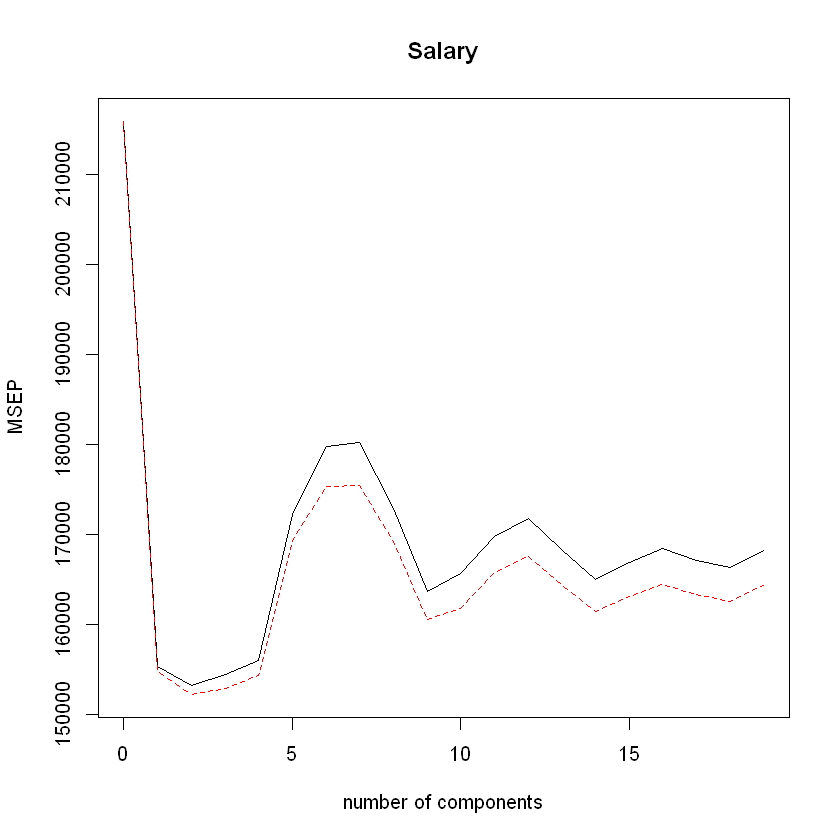

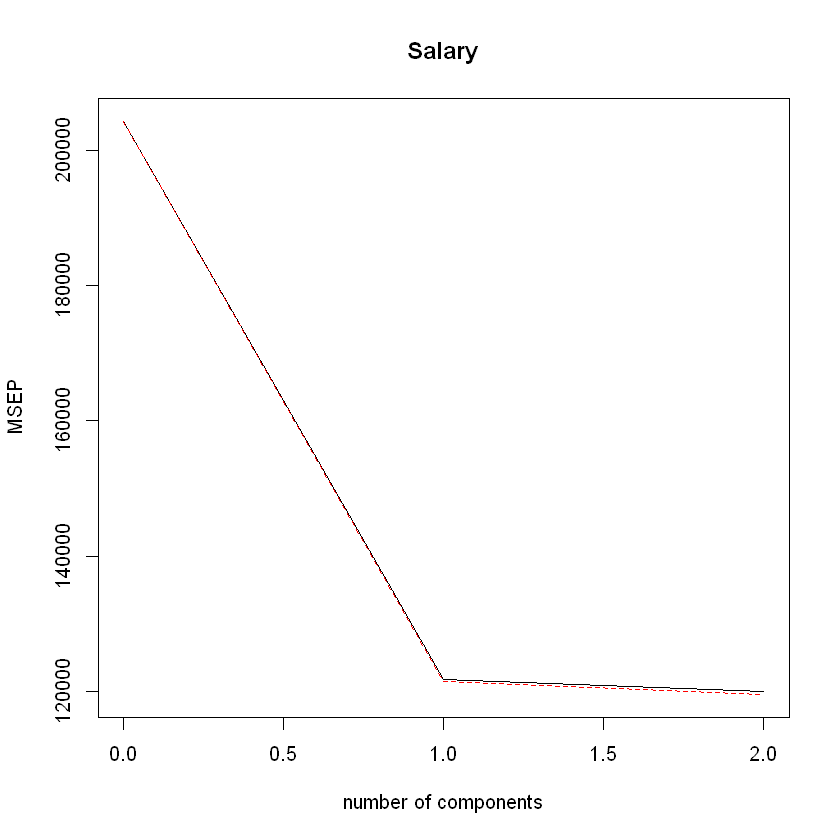

In [74]:
#pls - Achieves lowest CV Error with M=2 itself

set.seed(1)
pls.fit=plsr(Salary~.,data=Hitters,subset=train,scale=TRUE,validation='CV')
summary(pls.fit)
validationplot(pls.fit,val.type='MSEP')

#test set MSE is slightly higher than that of PCA
pls.pred=predict (pls.fit ,x[test ,], ncomp =2)
mean((pls.pred -y.test)^2)

#pls on the full dataset
pls.fit=plsr(Salary~.,data=Hitters,scale=TRUE,validation='CV',ncomp=2)
summary(pls.fit)
validationplot(pls.fit,val.type='MSEP')